## Predicting Arrest Outcomes in Terry Stops: A Data-Driven Analysis 
###  Business Understanding

#### Overview
Arrest decisions following Terry Stops are critical moments in policing, with significant legal, social, and ethical implications. While such stops are based on "reasonable suspicion," concerns have been raised about potential disparities in arrest outcomes across race and gender. In this project, I aim to use historical stop data to predict whether an arrest is likely to occur after a Terry Stop. By identifying key patterns and risk factors, law enforcement agencies can gain deeper insights into their decision-making processes, assess potential biases, and take data-informed steps toward fairer and more accountable policing practices.

#### Business Problem

Discretionary arrest decisions during Terry Stops have drawn increasing scrutiny due to concerns about potential bias and lack of transparency. Law enforcement agencies face challenges in understanding the key factors influencing whether an arrest is made, particularly when outcomes may disproportionately affect certain demographic groups. Without data-driven insights, it becomes difficult to ensure fair and accountable policing practices.

To address this, I aim to:

1. Predict the likelihood of an arrest following a Terry Stop.

2. Identify the most influential factors contributing to arrest decisions.

3. Provide actionable insights to help law enforcement evaluate patterns, detect disparities, and guide equitable policing interventions.

## Data 

### Data Understanding

The dataset being used for this project was obtained from City of Seattle Open data Portal. Here, I am going to review the dataset to assess the structure and characteristics of the data.


1. Loading Data Set

In [1]:
# Importing Relevant Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score


In [3]:
# Loading Data
df= pd.read_csv('Terry_Stops_20250719.csv')

In [4]:
# Display the first 5 rows
df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,Jan-17,-1,2.020000e+13,28020,Referred for Prosecution,Lethal Cutting Instrument,4585,1955,Male,Hispanic,...,10:00.0,-,-,-,NaN,N,Y,East,G,G2
1,36 - 45,-1,2.020000e+13,28092,Field Contact,None,7634,1977,Male,White,...,49:00.0,-,-,-,NaN,N,N,-,-,-
2,18 - 25,-1,2.010000e+13,305901,Arrest,None,7661,1984,Male,White,...,13:00.0,-,-,-,NaN,N,N,West,M,M3
3,18 - 25,-1,2.020000e+13,28093,Field Contact,None,7634,1977,Male,White,...,55:00.0,-,-,-,NaN,N,N,-,-,-
4,26 - 35,-1,2.020000e+13,28755,Offense Report,None,7429,1984,Male,White,...,08:00.0,THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING),DISTURBANCE - OTHER,911,NaN,N,N,East,G,G3


In [5]:
# ,Info()To get the general information about the data and each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64186 entries, 0 to 64185
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Subject Age Group         64186 non-null  object 
 1   Subject ID                64186 non-null  int64  
 2   GO / SC Num               64186 non-null  float64
 3   Terry Stop ID             64186 non-null  int64  
 4   Stop Resolution           64186 non-null  object 
 5   Weapon Type               64186 non-null  object 
 6   Officer ID                64186 non-null  object 
 7   Officer YOB               64186 non-null  int64  
 8   Officer Gender            64186 non-null  object 
 9   Officer Race              64186 non-null  object 
 10  Subject Perceived Race    64186 non-null  object 
 11  Subject Perceived Gender  64186 non-null  object 
 12  Reported Date             64186 non-null  object 
 13  Reported Time             64186 non-null  object 
 14  Initia

2. Data Preparation

    2.1 Data Cleaning



In [6]:
# Drop Columns irrelevant Columns
df = df.drop(columns=[
    'Subject ID', 'Terry Stop ID', 'GO / SC Num', 'Officer ID', 'Reported Time','Stop Resolution',
    'Officer Squad',
    'Final Call Type',
    'Call Type',
    'Precinct',
    'Sector',
    'Beat',
])

In [7]:
# Drop for missing values
df.dropna()

,Subject Age Group,Weapon Type,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Initial Call Type,Arrest Flag,Frisk Flag
0,Jan-17,Lethal Cutting Instrument,1955,Male,Hispanic,Black or African American,Female,2015-03-15T00:00:00Z,-,N,Y
1,36 - 45,None,1977,Male,White,Multi-Racial,Male,2015-03-16T00:00:00Z,-,N,N
2,18 - 25,None,1984,Male,White,Black or African American,Male,2015-03-16T00:00:00Z,-,N,N
3,18 - 25,None,1977,Male,White,White,Male,2015-03-16T00:00:00Z,-,N,N
4,26 - 35,None,1984,Male,White,Black or African American,Male,2015-03-17T00:00:00Z,THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING),N,N
...,...,...,...,...,...,...,...,...,...,...,...
64181,18 - 25,-,1993,Female,White,Black or African American,Male,2025-07-18T00:00:00Z,SHOPLIFT - THEFT,Y,N
64182,26 - 35,-,1990,Female,White,Black or African American,Female,2025-07-18T00:00:00Z,ASLT - WITH OR W/O WPNS (NO SHOOTINGS),N,N
64183,36 - 45,-,1976,Male,Asian,White,Male,2025-07-18T00:00:00Z,"SUSPICIOUS PERSON, VEHICLE, OR INCIDENT",N,N
64184,26 - 35,-,1991,Male,Asian,Black or African American,Male,2025-07-18T00:00:00Z,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",N,N


In [8]:
# Drop Rows with '-' in Any Column
df = df[~df.apply(lambda row: row.astype(str).eq('-').any(), axis=1)]

"-" is typically used to represent missing

In [9]:
# Drop Rows in subject Age Group column containing  Jan-17
df = df[~df['Subject Age Group'].isin(['-', 'Jan-17'])]

"Jan-17" appears to be a data entry error, likely meant for a date field, not an age group.

In [10]:
# Check for duplicates

df.duplicated().sum()

1029

1029 Missing values

In [11]:
# Drop duplicated rows
df_cleaned= df.drop_duplicates()

In [12]:
# Checking dataframe after removing duplicates
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20726 entries, 4 to 64177
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         20726 non-null  object
 1   Weapon Type               20726 non-null  object
 2   Officer YOB               20726 non-null  int64 
 3   Officer Gender            20726 non-null  object
 4   Officer Race              20726 non-null  object
 5   Subject Perceived Race    20726 non-null  object
 6   Subject Perceived Gender  20726 non-null  object
 7   Reported Date             20726 non-null  object
 8   Initial Call Type         20726 non-null  object
 9   Arrest Flag               20726 non-null  object
 10  Frisk Flag                20726 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.9+ MB


In [13]:
# Covert reported date colum to have month and year
df_cleaned = df_cleaned.copy()

# Convert ISO datetime string to datetime object (handles the 'T' and 'Z')
df_cleaned.loc[:, 'Reported Date'] = pd.to_datetime(df_cleaned['Reported Date'], utc=True)

# Extract Month-Year in desired format (e.g., "March 2015")
df_cleaned.loc[:, 'Reported_year'] = df_cleaned['Reported Date'].dt.strftime('%Y')

# preview result
print(df_cleaned[['Reported Date', 'Reported_year']].head())

              Reported Date Reported_year
4 2015-03-17 00:00:00+00:00          2015
6 2015-03-17 00:00:00+00:00          2015
7 2015-03-17 00:00:00+00:00          2015
8 2015-03-18 00:00:00+00:00          2015
9 2015-03-18 00:00:00+00:00          2015


In [14]:
# Drop Reported Date Column
df_cleaned = df_cleaned.drop(columns=['Reported Date'], errors='ignore')

In [15]:
# Map the Arrest Flag and Frisk Flag Column
df_cleaned['Arrest Flag'] = df_cleaned['Arrest Flag'].map({'Y': 1, 'N': 0})
df_cleaned['Frisk Flag'] = df_cleaned['Frisk Flag'].map({'Y': 1, 'N': 0})

In [16]:
#Downloading the cleaned data
df_cleaned.to_csv('cleaned_terry_stop_data.csv', index=False)

2.2 Exploratory Data Analysis (EDA)

2.2.1 Univariate Analysis

a. Analysis of Arrest By age Group

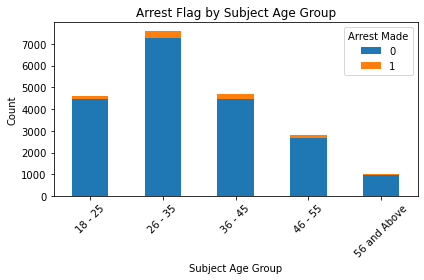

In [17]:
# Crosstab
age_arrest_ct = pd.crosstab(df_cleaned['Subject Age Group'], df_cleaned['Arrest Flag'])

# Stacked bar chart
age_arrest_ct.plot(kind='bar', stacked=True)
plt.title('Arrest Flag by Subject Age Group')
plt.xlabel('Subject Age Group')
plt.ylabel('Count')
plt.legend(title='Arrest Made')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

i. Majority of stops and arrests were for drivers between the ages of 26-35


b. Analysis of arrest by Race

Chi-square statistic: 201.26833068757753
p-value: 3.4532829606678795e-39


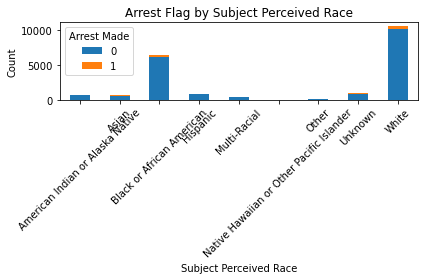

In [18]:
race_arrest_ct = pd.crosstab(df_cleaned['Subject Perceived Race'], df_cleaned['Arrest Flag'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(race_arrest_ct)
print("Chi-square statistic:", chi2)
print("p-value:", p)

# Optional: Stacked bar chart
race_arrest_ct.plot(kind='bar', stacked=True)
plt.title('Arrest Flag by Subject Perceived Race')
plt.xlabel('Subject Perceived Race')
plt.ylabel('Count')
plt.legend(title='Arrest Made')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A chi-square statistic of 193.76 is very large, suggesting that the differences in arrest rates across racial groups are substantial, not just statistically significant.

2.2.2 Multivariate Analysis

a. Analysis of arrests by Officer Gender & Subject Gender 

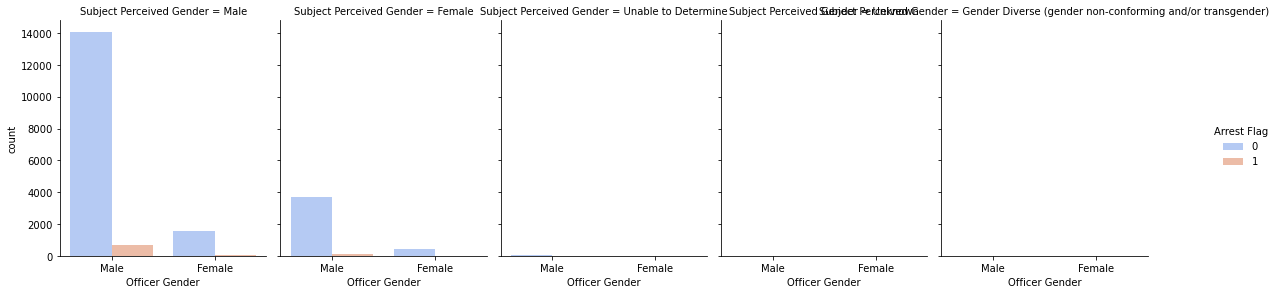

In [19]:
sns.catplot(
    data=df_cleaned,
    x='Officer Gender',
    hue='Arrest Flag',
    col='Subject Perceived Gender',
    kind='count',
    height=4,
    aspect=0.8,
    palette='coolwarm'
)

i. All arrests were done by male officers

b. Arrest and Frisk  Rate Over Time

<Figure size 864x432 with 0 Axes>

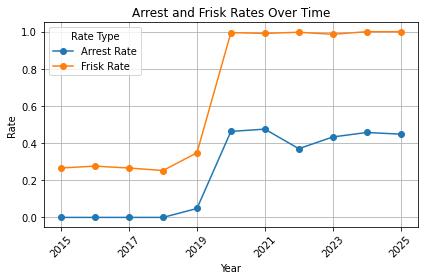

In [20]:
# Group and calculate mean (rate) for Arrest and Frisk
arrest_rate = df_cleaned.groupby('Reported_year')['Arrest Flag'].mean().sort_index()
frisk_rate = df_cleaned.groupby('Reported_year')['Frisk Flag'].mean().sort_index()

# Combine into one DataFrame
rates_df = pd.DataFrame({
    'Arrest Rate': arrest_rate,
    'Frisk Rate': frisk_rate
})

# Plot
plt.figure(figsize=(12, 6))
rates_df.plot(marker='o')

plt.title('Arrest and Frisk Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Rate Type')
plt.tight_layout()
plt.show()


Majority of arrests took place in 2021

2.2.3 Correlation analysis

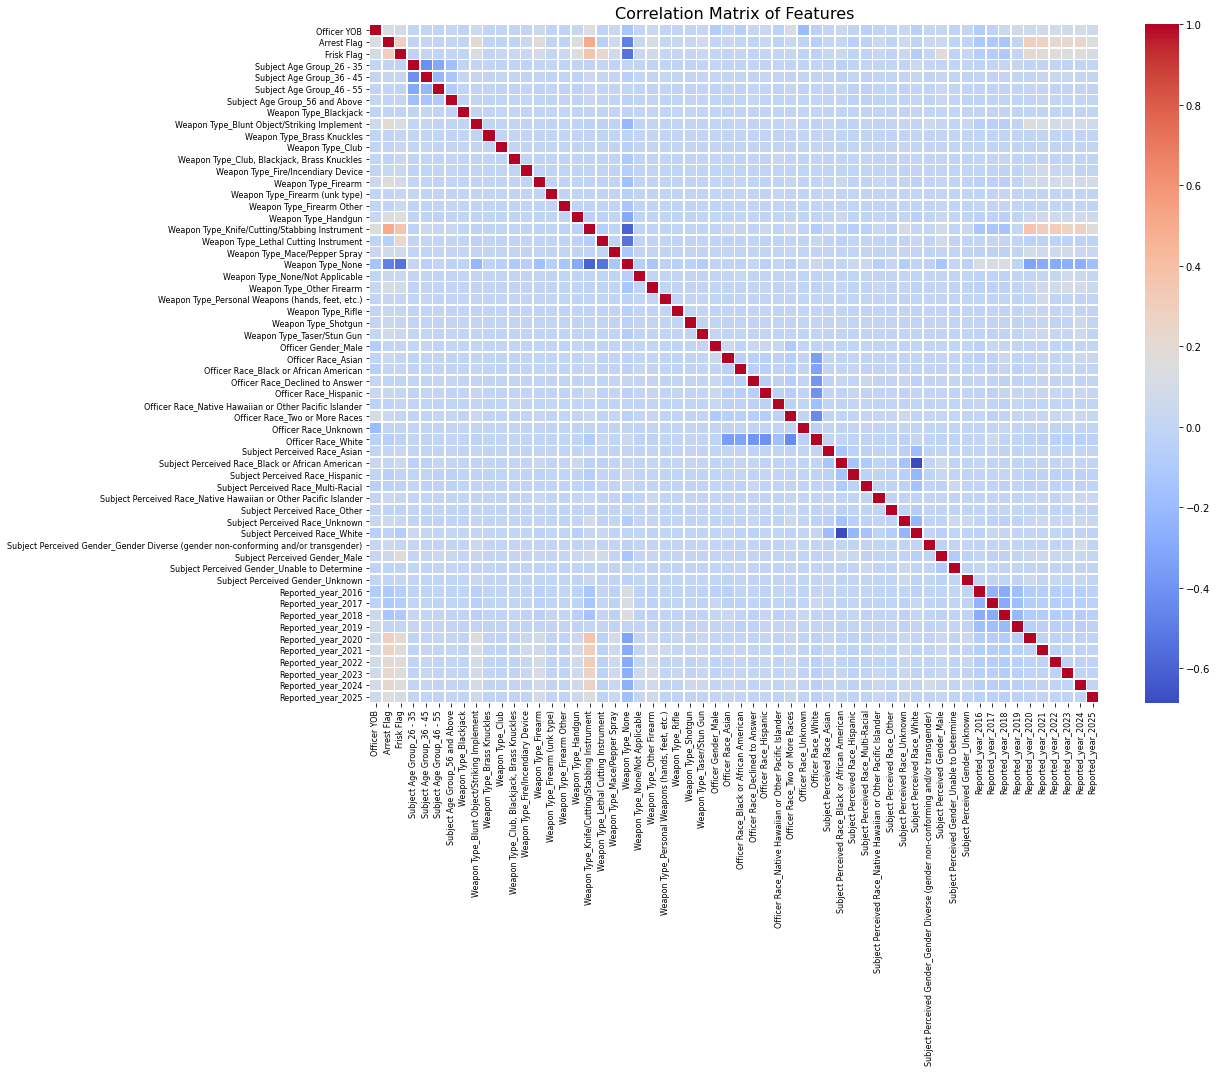

In [21]:
# Identify numerical and categorical columns again after dropping 'Officer Squad'
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_cleaned.select_dtypes(include='object').columns

# Select categorical columns with low cardinality for one-hot encoding
# Exclude 'Initial Call Type' (157), 'Final Call Type' (158), 'Beat' (53) due to high cardinality
low_cardinality_categorical_cols = [
    col for col in categorical_cols
    if df_cleaned[col].nunique() <= 25 and col not in ['Initial Call Type', 'Final Call Type', 'Beat']
]

# Create a DataFrame with both numerical and selected low-cardinality categorical columns
# This is the crucial fix: ensure categorical columns are present before one-hot encoding
df_for_corr = df_cleaned[numerical_cols.tolist() + low_cardinality_categorical_cols].copy()

# Perform one-hot encoding on the selected low-cardinality categorical columns
df_encoded = pd.get_dummies(df_for_corr, columns=low_cardinality_categorical_cols, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features', fontsize=16)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()




Insights :

Weapons are a major factor: The presence and type of weapon are the strongest indicators associated with an arrest after a Terry Stop. Specifically, the presence of a Knife/Cutting/Stabbing Instrument has the highest positive correlation, while Weapon Type_None has the strongest negative correlation.

Frisk outcome matters: The Frisk Flag being set to 1 (frisk conducted) also shows a notable positive correlation with arrest, reinforcing the link between the perceived threat or discovery during a frisk and the likelihood of an arrest.

Temporal trends: The Reported_year correlation suggests a potential increase in arrests over time within this dataset's period, warranting further investigation into policy changes or enforcement patterns.

### 3. Model Training

3.1 Train Test Split

In [22]:
# Define target variable (y) and features (X)
X = df_cleaned.drop('Arrest Flag', axis=1)
y = df_cleaned['Arrest Flag']

# Identify categorical features for one-hot encoding
categorical_features = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)





3.2 SMOTE for Class Imbalance


The  target variable  (Arrest Flag) is imbalanced.

The  model may be biased toward predicting the majority class (no arrest).
SMOTE solves this by synthetically generating new samples for the minority class (class 1).

In [23]:
smote = SMOTE(random_state=42)

# Apply to training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Optional: Print class distribution after resampling
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({0: 13898, 1: 610})
After SMOTE: Counter({0: 13898, 1: 13898})


3.3 Standardization


To ensure that each feature contributes equally to the model.

In [24]:
# Separate numeric and categorical columns
categorical_columns = X.select_dtypes(include='uint8').columns  # One-hot encoded
numerical_columns = X.drop(categorical_columns, axis=1).columns

# Initialize StandardScaler
scaler = StandardScaler()

# fit only numerical columns
X_train_scaled = scaler.fit_transform(X_train[numerical_columns])
X_train_scaled_resampled = scaler.transform(X_train_resampled[numerical_columns])
X_test_scaled = scaler.transform(X_test[numerical_columns])

# Combine the scaled numerical columns and categoricalcolumns into one dataframe
X_train_scaled = pd.concat([pd.DataFrame(X_train_scaled, columns=numerical_columns), X_train[categorical_columns].reset_index(drop=True)], axis=1)
X_train_scaled_resampled = pd.concat([pd.DataFrame(X_train_scaled_resampled, columns=numerical_columns), X_train_resampled[categorical_columns].reset_index(drop=True)], axis=1)
X_test_scaled = pd.concat([pd.DataFrame(X_test_scaled, columns=numerical_columns), X_test[categorical_columns].reset_index(drop=True)], axis=1)

3.4  Modelling and Evaluation

I will be comparing two models here:

1. Logistic regression model.

Since it is well-suited for binary classification problems like the one we are facing of predicting arrest or no arrest.

2. Random forest classifier.

These models' performance will then be evaluated by use of classification metrics such as roc-auc score, precision, recall and F1 score.

#### 1. Logistic Regression Model

In [25]:
# Initialize logistic regression
lr = LogisticRegression(max_iter=1000,random_state=42)

# Train the model on the resampled dataset
lr.fit(X_train_scaled_resampled, y_train_resampled)

# Make predictions
y_pred_lr = lr.predict(X_test_scaled)
y_pred_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

Model Evaluation

In [26]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print(f"Logistic Regression ROC-AUC Score: {roc_auc_lr:.4f}")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      5957
           1       0.45      0.73      0.56       261

    accuracy                           0.95      6218
   macro avg       0.72      0.85      0.77      6218
weighted avg       0.97      0.95      0.96      6218

Logistic Regression ROC-AUC Score: 0.9734


ROC Curve

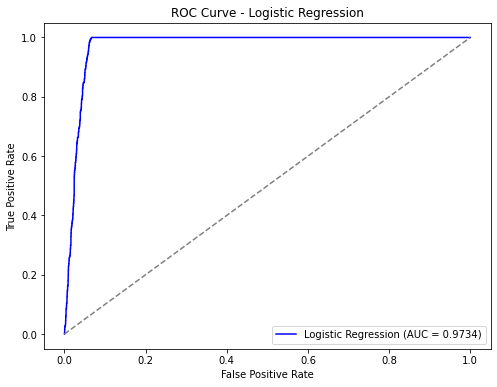

In [27]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.4f})", color="blue")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")

plt.legend()
plt.show()

####  2. Random Forest Classifier

In [28]:

# Initialize and train a RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

Model evaluation

In [29]:

y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate and print Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {rf_accuracy:.4f}")

# Calculate and print ROC-AUC
rf_roc_auc = roc_auc_score(y_test, y_pred_proba_rf)
print(f"ROC-AUC: {rf_roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))



Accuracy: 0.9503
ROC-AUC: 0.9741

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      5957
           1       0.45      0.80      0.57       261

    accuracy                           0.95      6218
   macro avg       0.72      0.88      0.77      6218
weighted avg       0.97      0.95      0.96      6218



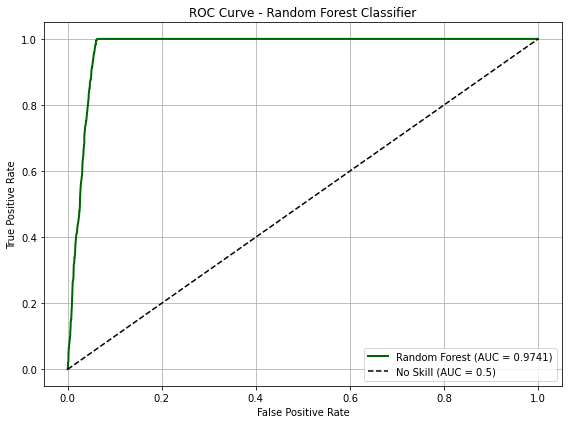

In [30]:
# Get the False Positive Rate, True Positive Rate, and thresholds
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {rf_roc_auc:.4f})", color='darkgreen', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="No Skill (AUC = 0.5)")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Classifier")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


### **Interpretation of Results**:

High Accuracy and ROC-AUC: The overall accuracy of 95 and an ROC-AUC score of 0.9741 indicate that the model performs very well in distinguishing between arrest and no-arrest scenarios. This is further supported by the ROC curve (shown above), which is significantly above the diagonal line, suggesting good discriminative power.

Performance for 'No Arrest' (Class 0): The model shows excellent performance for predicting 'no arrest' outcomes, with high precision (0.99, recall (0.96), and F1-score (0.97). This is expected due to the large number of samples in this class.

Performance for 'Arrest' (Class 1): While the model's overall performance is strong, the precision (0.45), recall (0.80), and F1-score (0.57) for predicting 'arrest' outcomes (Class 1) are lower. This means that when the model predicts an arrest, it is correct about 45 of the time (precision), and it correctly identifies 80% of all actual arrests (recall). The F1-score, which balances precision and recall, is 0.57. 

###  Comparison between the logistic regression model and the random forest classifier

### 1. Classification report

1. **Overall Accuracy**:

Both models show almost identical overall accuracy (around 95%). T Since the majority class (Class 0) makes up over 95% of your dataset, a model that performs well on Class 0 will naturally have a high overall accuracy, even if it struggles with Class 1. This metric alone is not sufficient to judge performance on imbalanced datasets.

2. **ROC-AUC Score**:

Random Forest (0.9741) has a marginally higher ROC-AUC than Logistic Regression (0.9734).

Both scores are exceptionally high, indicating that both models are very good at distinguishing between the positive and negative classes based on their predicted probabilities.

3. **Performance on Class 0 (Majority Class - No Arrest)**:

Both models perform identically and excellently on the majority class. They both achieve 0.99 precision, 0.96 recall, and 0.97 F1-score. This means they are very good at correctly identifying instances where no arrest occurs and rarely misclassify a non-arrest as an arrest.


### 2. ROC Curve

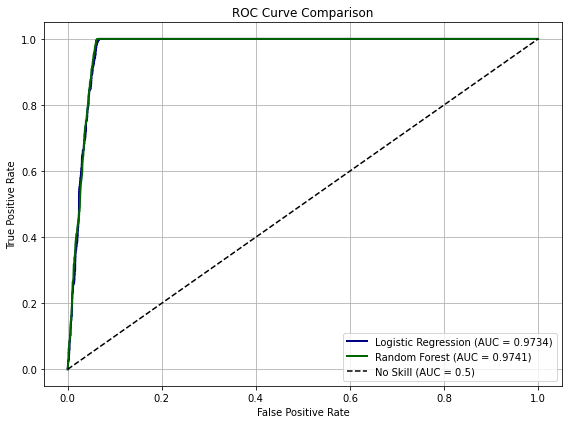

In [31]:

# Compute ROC curve values
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)  # Logistic Regression
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)  # Random Forest

# Compute AUCs
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.4f})", color='navy', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.4f})", color='darkgreen', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill (AUC = 0.5)')  # Diagonal line

# Chart formatting
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


### Feature Importance Analysis

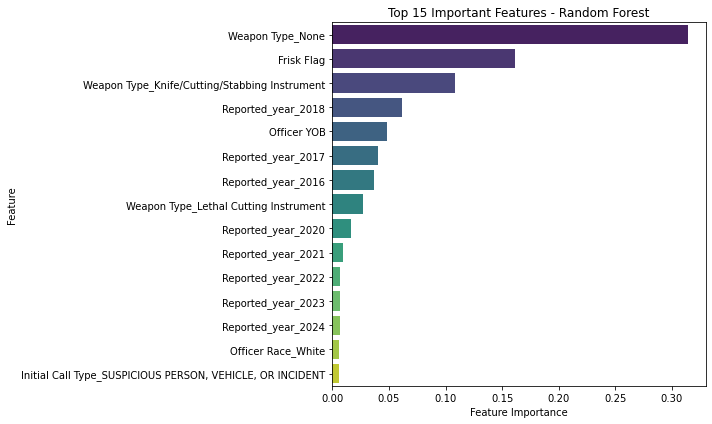

In [32]:
# Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_rf = pd.DataFrame({
    'Feature': X_train_scaled_resampled.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top N features
top_n = 15
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf.head(top_n), palette='viridis')
plt.title(f"Top {top_n} Important Features - Random Forest")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



The chart above displays the top 15 most important features that influenced the model's predictions.

**Weapon Type (None)**: This was the strongest predictor of arrest likelihood. It suggests that the absence of a weapon is strongly associated with decisions not to arrest, possibly indicating a lower perceived threat.

**Frisk Flag**: The presence of a frisk is another strong signal, likely correlated with heightened suspicion or safety concerns during the stop.

These findings imply that arrest decisions may be strongly driven by perceived risk indicators like weapon presence or the need to frisk, highlighting the importance of training and policy evaluations focused on these factors.


### Conclusion

**Logistic Regression** demonstrates high performance on the majority class (non-arrest), with precision and recall values of 0.99 and 0.96 respectively. However, it underperforms on the minority class (arrest), yielding a precision of 0.45 and recall of 0.73. Despite its strong ROC-AUC score of 0.9734, the model struggles with class imbalance, making it less effective at correctly identifying positive arrest instances. Nonetheless, its simplicity, interpretability, and computational efficiency make it suitable for baseline modeling or when model transparency is required.


**Random Forest** provides a more balanced classification capability across both classes. It achieves similar overall accuracy (95.03%) and a slightly higher ROC-AUC score (0.9741), while improving recall for the arrest class to 0.80. This indicates better sensitivity to the minority class. Random Forest is more robust in handling imbalanced datasets and capturing complex feature interactions, making it a better fit when maximizing recall and overall detection of arrest outcomes is a priority.



**Recommendations**

For better performance on both classes, Random Forest is the better model, especially if your goal is to achieve a more robust performance for arrest while handling class imbalance. The higher ROC-AUC score and overall classification report indicate its suitability for this task.

If interpretability and computational efficiency are key, Logistic Regression might be preferred, but additional techniques (like tuning the model further, or applying SMOTE) could help improve its performance.

**NOTE**: However, for arrest prediction in this case, Random Forest should be prioritized, especially when dealing with imbalanced data.

As shown in feature importance analysis:

**Weapon Type (None)**: This was the strongest predictor of arrest likelihood. It suggests that the absence of a weapon is strongly associated with decisions not to arrest, possibly indicating a lower perceived threat.

**Frisk Flag**: The presence of a frisk is another strong signal, likely correlated with heightened suspicion or safety concerns during the stop.

These findings imply that arrest decisions may be strongly driven by perceived risk indicators like weapon presence or the need to frisk, highlighting the importance of training and policy evaluations focused on these factors.